# Assignment2 Decision Tree & Random Forest & KNN & PCA


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from six import StringIO
import prettytable

# Data input


In [2]:
df=pd.read_csv('student-mat.csv',sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# Data Preprocessing
## Binary classification
 pass if G3≥10, else fail

In [3]:
#generate binary label
df_bi=df.copy()
df_bi['pass']=df_bi.apply(lambda row:1 if row['G3']>=10 else 0,axis=1)
df_bi=df_bi.drop(['G3'],axis=1)
df_bi

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,1


### one-hot-encoding

In [4]:
df_bi=pd.get_dummies(df_bi,columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob',
                                 'reason','guardian','schoolsup','famsup','paid','activities',
                                'nursery','higher','internet','romantic'])
df_bi

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


### shuffle data

In [5]:
df_bi=sklearn.utils.shuffle(df_bi)

### split training and testing data

In [6]:
y = df_bi['pass'].values
x = df_bi.drop(['pass'], axis=1).values

### Build Table

In [368]:
table1=prettytable.PrettyTable()
table1.field_names=['[Binary] Decision Tree ','Accuracy','Recall','Precision']

table2=prettytable.PrettyTable()
table2.field_names=['[Binary] Random Forest','Accuracy','Recall','Precision']

table3=prettytable.PrettyTable()
table3.field_names=['[Binary] KNN Classifier ','Accuracy','Recall','Precision']

# Model Construction 
* The data consists of both categorical and numerical features, and you have to treat them differently.
* Decision Tree, Random Forest, and K-Nearest Neighbor.

## Without PCA
### Decision Tree

In [369]:
dtc = DecisionTreeClassifier()

In [370]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtc.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, dtc.predict(x_test)))
    kf_acc=accuracy_score(y_test,dtc.predict(x_test))
    kf_recall=recall_score(y_test,dtc.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,dtc.predict(x_test),average='weighted')
    
    accuracies=dtc.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 89.31%


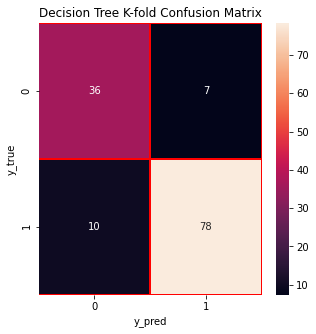

In [371]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree K-fold Confusion Matrix")
plt.show()

In [372]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table1.add_row(["Decision Tree without PCA",acc,recall,prec])
print(table1)

+---------------------------+----------+--------+-----------+
|  [Binary] Decision Tree   | Accuracy | Recall | Precision |
+---------------------------+----------+--------+-----------+
| Decision Tree without PCA |  89.313  | 89.313 |  89.8136  |
+---------------------------+----------+--------+-----------+


In [373]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, dtc.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.780     0.865     0.821        37
           1      0.944     0.904     0.924        94

    accuracy                          0.893       131
   macro avg      0.862     0.885     0.872       131
weighted avg      0.898     0.893     0.895       131



### Random Forest
* numbers of trees=10

In [374]:
# n trees=10
forest1 = RandomForestClassifier(n_estimators=10)

In [375]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    forest1.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, forest1.predict(x_test)))
    kf_acc=accuracy_score(y_test,forest1.predict(x_test))
    kf_recall=recall_score(y_test,forest1.predict(x_test))
    kf_prec=precision_score(y_test,forest1.predict(x_test))
    
    accuracies=forest1.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 87.02%


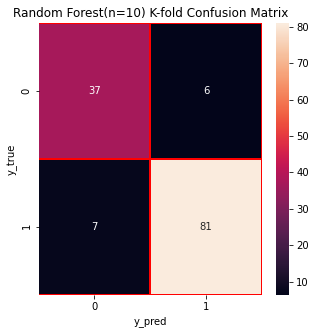

In [376]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest(n=10) K-fold Confusion Matrix")
plt.show()

In [377]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table2.add_row(["Random Forest(n=10) without PCA",acc,recall,prec])
print(table2)

+---------------------------------+----------+--------+-----------+
|      [Binary] Random Forest     | Accuracy | Recall | Precision |
+---------------------------------+----------+--------+-----------+
| Random Forest(n=10) without PCA | 87.0229  | 88.764 |  91.8605  |
+---------------------------------+----------+--------+-----------+


In [378]:
print(metrics.classification_report(y_test, forest1.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.778     0.833     0.805        42
           1      0.919     0.888     0.903        89

    accuracy                          0.870       131
   macro avg      0.848     0.860     0.854       131
weighted avg      0.873     0.870     0.871       131



### KNN Classifier

* neighbors=5

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, knn.predict(x_test)))
    kf_acc=accuracy_score(y_test,knn.predict(x_test))
    kf_recall=recall_score(y_test,knn.predict(x_test))
    kf_prec=precision_score(y_test,knn.predict(x_test))
    
    accuracies=knn.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 87.79%


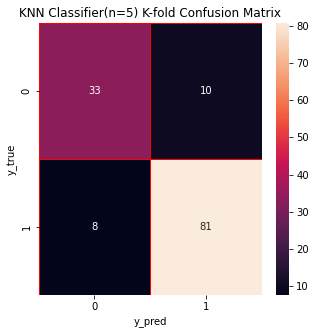

In [9]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Classifier(n=5) K-fold Confusion Matrix")
plt.show()

In [15]:
error_rate=[]

for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_list=knn.predict(x_test)
    error_rate.append(np.mean(pred_list!=y_test))

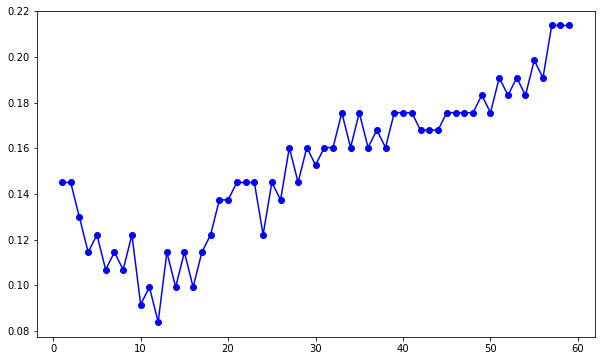

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',marker='o')

In [17]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table3.add_row(["KNN Classifier(n=5) without PCA",acc,recall,prec])
print(table3)

NameError: name 'table3' is not defined

In [383]:
print(metrics.classification_report(y_test, knn.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.775     0.721     0.747        43
           1      0.868     0.898     0.883        88

    accuracy                          0.840       131
   macro avg      0.822     0.809     0.815       131
weighted avg      0.838     0.840     0.838       131



## With PCA

## Principal components analysis (PCA)
* Compare the results between using the original data and the dimension-reduced one.

### Decision Tree

In [384]:
dtc = DecisionTreeClassifier()

In [385]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    dtc.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, dtc.predict(x_test)))
    kf_acc=accuracy_score(y_test,dtc.predict(x_test))
    kf_recall=recall_score(y_test,dtc.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,dtc.predict(x_test),average='weighted')
    
    accuracies=dtc.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 89.31%


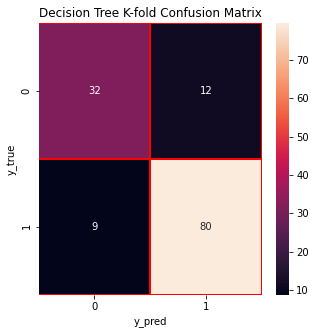

In [386]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree K-fold Confusion Matrix")
plt.show()

In [387]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table1.add_row(["Decision Tree with PCA",acc,recall,prec])
print(table1)

+---------------------------+----------+--------+-----------+
|  [Binary] Decision Tree   | Accuracy | Recall | Precision |
+---------------------------+----------+--------+-----------+
| Decision Tree without PCA |  89.313  | 89.313 |  89.8136  |
|   Decision Tree with PCA  |  89.313  | 89.313 |  89.2635  |
+---------------------------+----------+--------+-----------+


In [388]:
print(metrics.classification_report(y_test, dtc.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.872     0.837     0.854        49
           1      0.905     0.927     0.916        82

    accuracy                          0.893       131
   macro avg      0.889     0.882     0.885       131
weighted avg      0.893     0.893     0.893       131



### Random Forest
* numbers of trees=10

In [389]:
# n trees=10
forest1 = RandomForestClassifier(n_estimators=10)

In [390]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    forest1.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, forest1.predict(x_test)))
    kf_acc=accuracy_score(y_test,forest1.predict(x_test))
    kf_recall=recall_score(y_test,forest1.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,forest1.predict(x_test),average='weighted')
    
    accuracies=forest1.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 90.08%


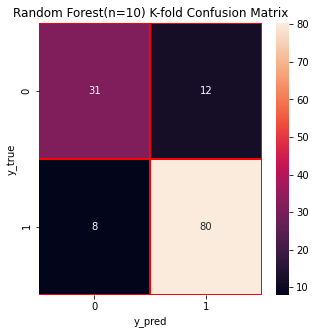

In [391]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest(n=10) K-fold Confusion Matrix")
plt.show()

In [392]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table2.add_row(["Random Forest(n=10) with PCA",acc,recall,prec])
print(table2)

+---------------------------------+----------+---------+-----------+
|      [Binary] Random Forest     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| Random Forest(n=10) without PCA | 87.0229  |  88.764 |  91.8605  |
|   Random Forest(n=10) with PCA  | 90.0763  | 90.0763 |  89.9642  |
+---------------------------------+----------+---------+-----------+


In [393]:
print(metrics.classification_report(y_test, forest1.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.879     0.763     0.817        38
           1      0.908     0.957     0.932        93

    accuracy                          0.901       131
   macro avg      0.893     0.860     0.874       131
weighted avg      0.900     0.901     0.899       131



* numbers of trees=20

In [394]:
# n trees=20
forest2 = RandomForestClassifier(n_estimators=20)

In [395]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    forest2.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, forest2.predict(x_test)))
    kf_acc=accuracy_score(y_test,forest2.predict(x_test))
    kf_recall=recall_score(y_test,forest2.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,forest2.predict(x_test),average='weighted')
    
    accuracies=forest2.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 90.08%


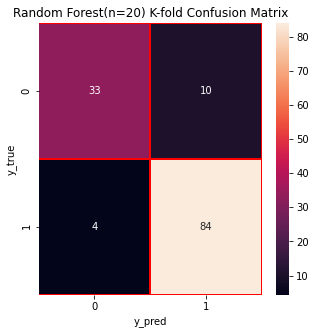

In [396]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest(n=20) K-fold Confusion Matrix")
plt.show()

In [397]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table2.add_row(["Random Forest(n=20) with PCA",acc,recall,prec])
print(table2)

+---------------------------------+----------+---------+-----------+
|      [Binary] Random Forest     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| Random Forest(n=10) without PCA | 87.0229  |  88.764 |  91.8605  |
|   Random Forest(n=10) with PCA  | 90.0763  | 90.0763 |  89.9642  |
|   Random Forest(n=20) with PCA  | 90.0763  | 90.0763 |  89.9618  |
+---------------------------------+----------+---------+-----------+


In [398]:
print(metrics.classification_report(y_test, forest2.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.865     0.800     0.831        40
           1      0.915     0.945     0.930        91

    accuracy                          0.901       131
   macro avg      0.890     0.873     0.880       131
weighted avg      0.900     0.901     0.900       131



* numbers of trees=30

In [399]:
# n trees=30
forest3 = RandomForestClassifier(n_estimators=30)

In [400]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    forest3.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, forest3.predict(x_test)))
    kf_acc=accuracy_score(y_test,forest3.predict(x_test))
    kf_recall=recall_score(y_test,forest3.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,forest3.predict(x_test),average='weighted')
    
    accuracies=forest3.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 88.55%


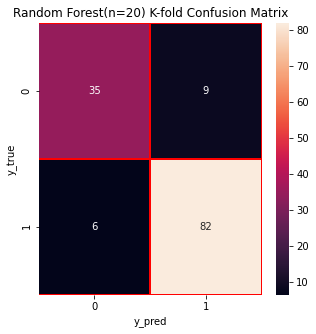

In [401]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest(n=20) K-fold Confusion Matrix")
plt.show()

In [402]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table2.add_row(["Random Forest(n=30) with PCA",acc,recall,prec])
print(table2)

+---------------------------------+----------+---------+-----------+
|      [Binary] Random Forest     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| Random Forest(n=10) without PCA | 87.0229  |  88.764 |  91.8605  |
|   Random Forest(n=10) with PCA  | 90.0763  | 90.0763 |  89.9642  |
|   Random Forest(n=20) with PCA  | 90.0763  | 90.0763 |  89.9618  |
|   Random Forest(n=30) with PCA  | 88.5496  | 88.5496 |  88.5019  |
+---------------------------------+----------+---------+-----------+


In [403]:
print(metrics.classification_report(y_test, forest3.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.844     0.826     0.835        46
           1      0.907     0.918     0.912        85

    accuracy                          0.885       131
   macro avg      0.876     0.872     0.874       131
weighted avg      0.885     0.885     0.885       131



### KNN Classifier
* neighbors=3

In [404]:
knn = KNeighborsClassifier(n_neighbors=3)

In [405]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    knn.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, knn.predict(x_test)))
    kf_acc=accuracy_score(y_test,knn.predict(x_test))
    kf_recall=recall_score(y_test,knn.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,knn.predict(x_test),average='weighted')
    
    accuracies=knn.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 81.68%


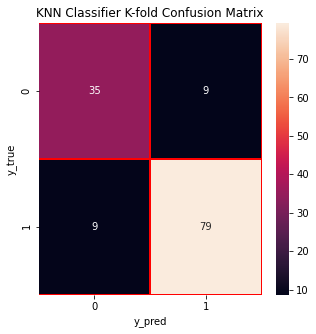

In [406]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Classifier K-fold Confusion Matrix")
plt.show()

In [407]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table3.add_row(["KNN Classifier(n=3) with PCA",acc,recall,prec])
print(table3)

+---------------------------------+----------+---------+-----------+
|     [Binary] KNN Classifier     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| KNN Classifier(n=5) without PCA | 83.9695  | 89.7727 |  86.8132  |
|   KNN Classifier(n=3) with PCA  | 81.6794  | 81.6794 |  82.3541  |
+---------------------------------+----------+---------+-----------+


In [408]:
print(metrics.classification_report(y_test, knn.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.667     0.737     0.700        38
           1      0.888     0.849     0.868        93

    accuracy                          0.817       131
   macro avg      0.777     0.793     0.784       131
weighted avg      0.824     0.817     0.819       131



* neighbors=5

In [409]:
knn = KNeighborsClassifier(n_neighbors=5)

In [410]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    knn.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, knn.predict(x_test)))
    kf_acc=accuracy_score(y_test,knn.predict(x_test))
    kf_recall=recall_score(y_test,knn.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,knn.predict(x_test),average='weighted')
    
    accuracies=knn.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 84.73%


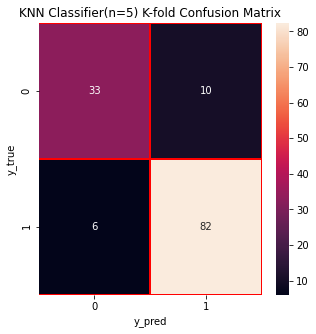

In [411]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Classifier(n=5) K-fold Confusion Matrix")
plt.show()

In [412]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table3.add_row(["KNN Classifier(n=5) with PCA",acc,recall,prec])
print(table3)

+---------------------------------+----------+---------+-----------+
|     [Binary] KNN Classifier     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| KNN Classifier(n=5) without PCA | 83.9695  | 89.7727 |  86.8132  |
|   KNN Classifier(n=3) with PCA  | 81.6794  | 81.6794 |  82.3541  |
|   KNN Classifier(n=5) with PCA  | 84.7328  | 84.7328 |  84.5579  |
+---------------------------------+----------+---------+-----------+


In [413]:
print(metrics.classification_report(y_test, knn.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.821     0.711     0.762        45
           1      0.859     0.919     0.888        86

    accuracy                          0.847       131
   macro avg      0.840     0.815     0.825       131
weighted avg      0.846     0.847     0.844       131



* neighbors=10

In [414]:
knn = KNeighborsClassifier(n_neighbors=10)

In [415]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    knn.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, knn.predict(x_test)))
    kf_acc=accuracy_score(y_test,knn.predict(x_test))
    kf_recall=recall_score(y_test,knn.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,knn.predict(x_test),average='weighted')
    
    accuracies=knn.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 88.55%


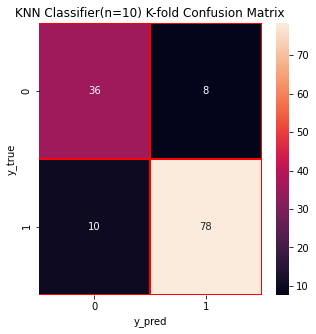

In [416]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Classifier(n=10) K-fold Confusion Matrix")
plt.show()

In [417]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table3.add_row(["KNN Classifier(n=10) with PCA",acc,recall,prec])
print(table3)

+---------------------------------+----------+---------+-----------+
|     [Binary] KNN Classifier     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| KNN Classifier(n=5) without PCA | 83.9695  | 89.7727 |  86.8132  |
|   KNN Classifier(n=3) with PCA  | 81.6794  | 81.6794 |  82.3541  |
|   KNN Classifier(n=5) with PCA  | 84.7328  | 84.7328 |  84.5579  |
|  KNN Classifier(n=10) with PCA  | 88.5496  | 88.5496 |  89.6666  |
+---------------------------------+----------+---------+-----------+


In [418]:
print(metrics.classification_report(y_test, knn.predict(x_test), digits=3))

              precision    recall  f1-score   support

           0      0.970     0.696     0.810        46
           1      0.857     0.988     0.918        85

    accuracy                          0.885       131
   macro avg      0.913     0.842     0.864       131
weighted avg      0.897     0.885     0.880       131



# 5-Level classification

In [419]:
df_level=df.copy()

def classifier(row):
    if row>=16:
        return '1'
    if row<=15 and row>=14:
        return '2'
    if row<=13 and row>=12:
        return '3'
    if row<=11 and row>=10:
        return '4'
    if row<=9 and row>=0:
        return '5'

df_level['level']=df_level.apply(lambda row: classifier(row['G3']),axis=1 )
df_level=df_level.drop(['G3'],axis=1)
df_level

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,level
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,4
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,5
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,5
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,4


### one-hot-encoding

In [420]:
df_level=pd.get_dummies(df_level,columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob',
                                 'reason','guardian','schoolsup','famsup','paid','activities',
                                'nursery','higher','internet','romantic'])
df_level.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### shffule data

In [421]:
df_level=sklearn.utils.shuffle(df_level)

In [422]:
y = df_level['level'].values
x = df_level.drop(['level'], axis=1).values

### Build Table

In [510]:
table1=prettytable.PrettyTable()
table1.field_names=['[5-level] Decision Tree ','Accuracy','Recall','Precision']

table2=prettytable.PrettyTable()
table2.field_names=['[5-level] Random Forest','Accuracy','Recall','Precision']

table3=prettytable.PrettyTable()
table3.field_names=['[5-level] KNN Classifier ','Accuracy','Recall','Precision']

## Without PCA
### Decision Tree

In [511]:
dtc = DecisionTreeClassifier()

In [512]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtc.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, dtc.predict(x_test)))
    kf_acc=accuracy_score(y_test,dtc.predict(x_test))
    kf_recall=recall_score(y_test,dtc.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,dtc.predict(x_test),average='weighted')
    
    accuracies=dtc.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 69.47%


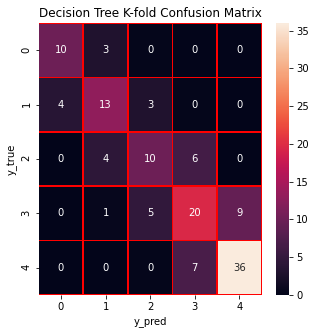

In [513]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree K-fold Confusion Matrix")
plt.show()

In [514]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table1.add_row(["Decision Tree without PCA",acc,recall,prec])
print(table1)

+---------------------------+----------+---------+-----------+
|  [5-level] Decision Tree  | Accuracy |  Recall | Precision |
+---------------------------+----------+---------+-----------+
| Decision Tree without PCA | 69.4656  | 69.4656 |  69.7535  |
+---------------------------+----------+---------+-----------+


In [515]:
print(metrics.classification_report(y_test, dtc.predict(x_test), digits=3))

              precision    recall  f1-score   support

           1      0.733     0.786     0.759        14
           2      0.647     0.550     0.595        20
           3      0.571     0.545     0.558        22
           4      0.562     0.643     0.600        28
           5      0.848     0.830     0.839        47

    accuracy                          0.695       131
   macro avg      0.672     0.671     0.670       131
weighted avg      0.698     0.695     0.695       131



### Random Forest

In [520]:
forest1 = RandomForestClassifier(n_estimators=20)

In [521]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    forest1.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, forest1.predict(x_test)))
    kf_acc=accuracy_score(y_test,forest1.predict(x_test))
    kf_recall=recall_score(y_test,forest1.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,forest1.predict(x_test),average='weighted')
    
    accuracies=forest1.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 61.07%


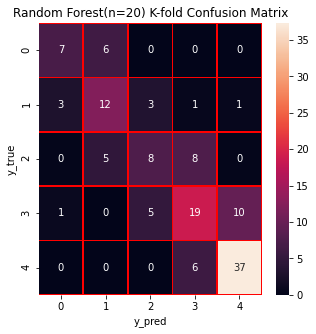

In [522]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest(n=20) K-fold Confusion Matrix")
plt.show()

In [523]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table2.add_row(["Random Forest(n=20) without PCA",acc,recall,prec])
print(table2)

+---------------------------------+----------+---------+-----------+
|     [5-level] Random Forest     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| Random Forest(n=20) without PCA | 61.0687  | 61.0687 |  60.4382  |
+---------------------------------+----------+---------+-----------+


In [524]:
print(metrics.classification_report(y_test, forest1.predict(x_test), digits=3))

              precision    recall  f1-score   support

           1      0.500     0.600     0.545        10
           2      0.524     0.550     0.537        20
           3      0.571     0.400     0.471        20
           4      0.562     0.500     0.529        36
           5      0.712     0.822     0.763        45

    accuracy                          0.611       131
   macro avg      0.574     0.574     0.569       131
weighted avg      0.604     0.611     0.603       131



### KNN Classifier

* neighbors=5

In [525]:
knn = KNeighborsClassifier(n_neighbors=5)

In [526]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, knn.predict(x_test)))
    kf_acc=accuracy_score(y_test,knn.predict(x_test))
    kf_recall=recall_score(y_test,knn.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,knn.predict(x_test),average='weighted')
    
    accuracies=knn.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 64.12%


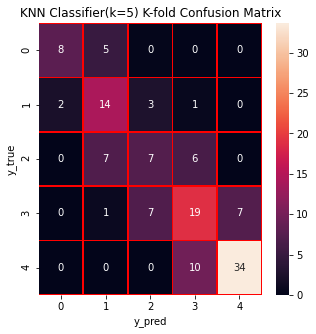

In [527]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Classifier(k=5) K-fold Confusion Matrix")
plt.show()

In [528]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table3.add_row(["KNN Classifier(k=5) without PCA",acc,recall,prec])
print(table3)

+---------------------------------+----------+---------+-----------+
|    [5-level] KNN Classifier     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| KNN Classifier(k=5) without PCA | 64.1221  | 64.1221 |  63.9549  |
+---------------------------------+----------+---------+-----------+


In [529]:
print(metrics.classification_report(y_test, knn.predict(x_test), digits=3))

              precision    recall  f1-score   support

           1      0.800     0.800     0.800        15
           2      0.609     0.700     0.651        20
           3      0.435     0.526     0.476        19
           4      0.577     0.405     0.476        37
           5      0.750     0.825     0.786        40

    accuracy                          0.641       131
   macro avg      0.634     0.651     0.638       131
weighted avg      0.640     0.641     0.634       131



## With PCA

## Principal components analysis (PCA)
* Compare the results between using the original data and the dimension-reduced one.

### Decision Tree

In [530]:
dtc = DecisionTreeClassifier()

In [531]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    dtc.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, dtc.predict(x_test)))
    kf_acc=accuracy_score(y_test,dtc.predict(x_test))
    kf_recall=recall_score(y_test,dtc.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,dtc.predict(x_test),average='weighted')
    
    accuracies=dtc.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 54.2%


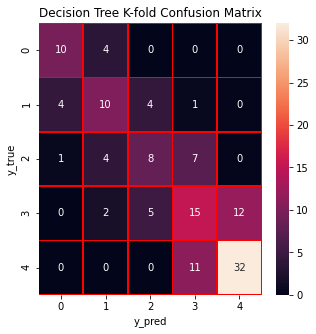

In [532]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree K-fold Confusion Matrix")
plt.show()

In [533]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table1.add_row(["Decision Tree with PCA",acc,recall,prec])
print(table1)

+---------------------------+----------+---------+-----------+
|  [5-level] Decision Tree  | Accuracy |  Recall | Precision |
+---------------------------+----------+---------+-----------+
| Decision Tree without PCA | 69.4656  | 69.4656 |  69.7535  |
|   Decision Tree with PCA  | 54.1985  | 54.1985 |  54.7327  |
+---------------------------+----------+---------+-----------+


In [534]:
print(metrics.classification_report(y_test, dtc.predict(x_test), digits=3))

              precision    recall  f1-score   support

           1      0.444     0.571     0.500         7
           2      0.400     0.444     0.421        18
           3      0.571     0.500     0.533        24
           4      0.474     0.474     0.474        38
           5      0.674     0.659     0.667        44

    accuracy                          0.542       131
   macro avg      0.513     0.530     0.519       131
weighted avg      0.547     0.542     0.544       131



### Random Forest

In [537]:
forest1 = RandomForestClassifier(n_estimators=20)

In [538]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    forest1.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, forest1.predict(x_test)))
    kf_acc=accuracy_score(y_test,forest1.predict(x_test))
    kf_recall=recall_score(y_test,forest1.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,forest1.predict(x_test),average='weighted')
    
    accuracies=forest1.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 60.31%


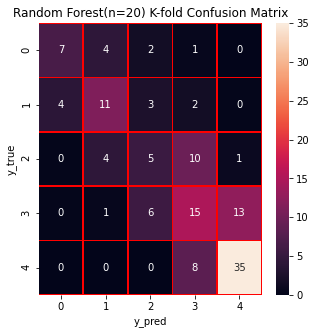

In [539]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest(n=20) K-fold Confusion Matrix")
plt.show()

In [540]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table2.add_row(["Random Forest(n=20) with PCA",acc,recall,prec])
print(table2)

+---------------------------------+----------+---------+-----------+
|     [5-level] Random Forest     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| Random Forest(n=20) without PCA | 61.0687  | 61.0687 |  60.4382  |
|   Random Forest(n=20) with PCA  | 60.3053  | 60.3053 |  57.1654  |
+---------------------------------+----------+---------+-----------+


In [541]:
print(metrics.classification_report(y_test, forest1.predict(x_test), digits=3))

              precision    recall  f1-score   support

           1      0.571     0.615     0.593        13
           2      0.556     0.476     0.513        21
           3      0.250     0.158     0.194        19
           4      0.594     0.514     0.551        37
           5      0.709     0.951     0.812        41

    accuracy                          0.603       131
   macro avg      0.536     0.543     0.532       131
weighted avg      0.572     0.603     0.579       131



### KNN Classifier

* neighbors=5

In [542]:
knn = KNeighborsClassifier(n_neighbors=5)

In [543]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pca = PCA(n_components='mle')
    pca.fit(x_train)
    x_train=pca.transform(x_train)
    x_test=pca.transform(x_test)
    knn.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, knn.predict(x_test)))
    kf_acc=accuracy_score(y_test,knn.predict(x_test))
    kf_recall=recall_score(y_test,knn.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,knn.predict(x_test),average='weighted')
    
    accuracies=knn.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)

K-fold cross-validation accuracy: 64.12%


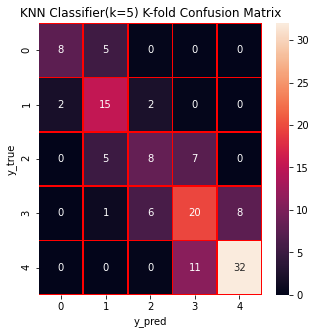

In [544]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Classifier(k=5) K-fold Confusion Matrix")
plt.show()

In [545]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table3.add_row(["KNN Classifier(k=5) with PCA",acc,recall,prec])
print(table3)

+---------------------------------+----------+---------+-----------+
|    [5-level] KNN Classifier     | Accuracy |  Recall | Precision |
+---------------------------------+----------+---------+-----------+
| KNN Classifier(k=5) without PCA | 64.1221  | 64.1221 |  63.9549  |
|   KNN Classifier(k=5) with PCA  | 64.1221  | 64.1221 |  67.3968  |
+---------------------------------+----------+---------+-----------+


In [546]:
print(metrics.classification_report(y_test, knn.predict(x_test), digits=3))

              precision    recall  f1-score   support

           1      0.875     0.700     0.778        10
           2      0.577     0.789     0.667        19
           3      0.500     0.364     0.421        22
           4      0.511     0.686     0.585        35
           5      0.882     0.667     0.759        45

    accuracy                          0.641       131
   macro avg      0.669     0.641     0.642       131
weighted avg      0.674     0.641     0.644       131



# Questions

## Decision Tree
- Show the prediction and reasoning of one arbitrary sample in the testing set

In [290]:
dy = df_bi['pass'].values
dx = df_bi.drop(['pass'], axis=1).values

In [291]:
clf=DecisionTreeClassifier(random_state=0)
dx_train, dx_test, dy_train, dy_test = train_test_split(
    dx, dy, test_size=0.33, random_state=42)
clf=clf.fit(dx_train,dy_train)

In [292]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("DecisionTree")

'DecisionTree.pdf'

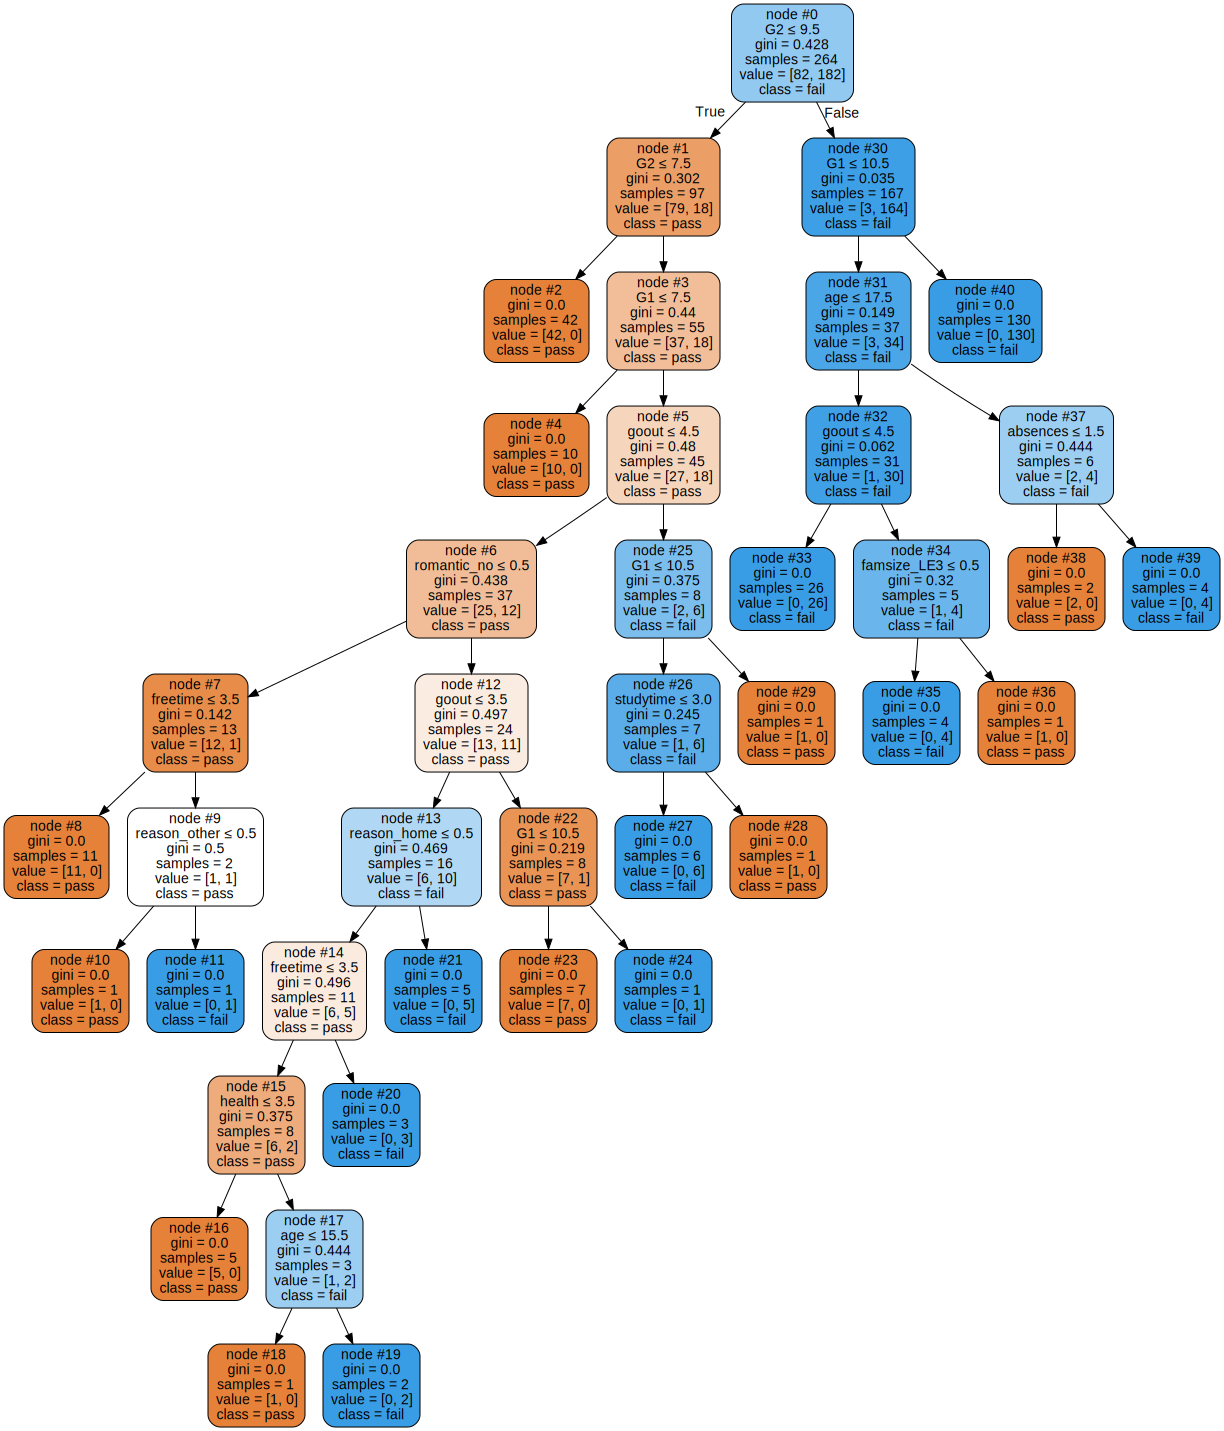

In [547]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names= df_bi.drop(['pass'], axis=1).columns,  
                     class_names= ['pass','fail'],  
                     filled=True, rounded=True,  
                     special_characters=True,
                               node_ids=True)  
graph = graphviz.Source(dot_data)  
graph 

In [550]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold


In [551]:
node_indicator = clf.decision_path(dx_test)
leaf_id = clf.apply(dx_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if dx_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=dx_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 14] = 8) <= 9.5)
decision node 1 : (X_test[0, 14] = 8) > 7.5)
decision node 3 : (X_test[0, 13] = 7) <= 7.5)


## Random Forest
Describe the difference between boosting and bagging.

**Bagging**
從訓練資料中隨機抽取(取出後放回，n<N)樣本訓練多個分類器，每個分類器的權重一致最後用投票方式得到最終結果

**Boosting**
和Bagging不同的是分類器之間是有關聯性的，是透過將舊分類器的錯誤資料權重提高，然後再訓練新的分類器

**差別**
- 樣本選擇
    - Bagging採用Bootstrap隨機放回抽樣
    - 每輪的training data不變，只有樣本權重會變
- 樣本權重
    - Bagging採用均勻取樣，使每個樣本權重相等
    - Boosting會根據錯誤率回調權重，錯誤率越大權重越大
- 預測函式
    - Bagging的預測函式權重相等
    - Boosting中誤差越小的預測函式其權重越大
- 平行計算
    - Bagging各個預測函式可以並行生成
    - Boosting各個預測函式必須按順序迭代生成

## KNN
* Show the prediction and reasoning of one arbitrary sample in the testing set.

In [318]:
knn_q = KNeighborsClassifier(n_neighbors=5)
kx_train, kx_test, ky_train, ky_test = train_test_split(
    x, y, test_size=0.33, random_state=42)
knn_q=knn_q.fit(kx_train,ky_train)

In [319]:
sample=10
distance,indice=knn_q.kneighbors(kx_test,return_distance=True)
distance[sample],indice[sample]
print("Sample : ",sample)
for i in range(5):
    vote_id=indice[sample][i]
    print("Nearest neighbor no.",i+1)
    print("Indice:",vote_id,"Distance:",distance[sample][i] ," Vote label:",ky_train[vote_id])
print("Actual Label:",ky_test[sample])

Sample :  10
Nearest neighbor no. 1
Indice: 42 Distance: 4.242640687119285  Vote label: 3
Nearest neighbor no. 2
Indice: 176 Distance: 4.242640687119285  Vote label: 2
Nearest neighbor no. 3
Indice: 227 Distance: 4.47213595499958  Vote label: 2
Nearest neighbor no. 4
Indice: 64 Distance: 4.898979485566356  Vote label: 2
Nearest neighbor no. 5
Indice: 104 Distance: 5.0  Vote label: 3
Actual Label: 2


## KNN Bonus 
- pick 2 features, draw and describe the KNN decision boundaries.You can pick 2 features to re-train the model, or just fix every other feature value.

In [353]:
df_bonus=df_level.loc[:,['G1','G2','level']]

by = df_bonus['level'].values
bx = df_bonus.drop(['level'], axis=1).values

knn_b = KNeighborsClassifier(n_neighbors=5)
bx_train, bx_test, by_train, by_test = train_test_split(
    bx, by, test_size=0.33, random_state=42)
knn_b=knn_b.fit(bx_train,by_train)

In [354]:
from matplotlib.colors import ListedColormap

h = 0.02  # step size in the mesh

# create colormap for the contour plot
cmap_light = ListedColormap(list(sns.color_palette('pastel', n_colors=5)))

# Plot the decision boundary.
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = df_bonus['G1'].min() - 1, df_bonus['G1'].max() + 1
y_min, y_max = df_bonus['G2'].min() - 1, df_bonus['G2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_b.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

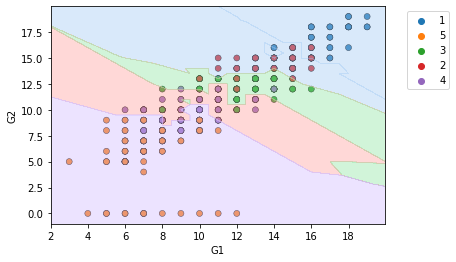

In [355]:

# create plot
fig, ax = plt.subplots()

# add data points
sns.scatterplot(data=df_bonus, x='G1', y='G2', hue='level', ax=ax, edgecolor='k')

# add decision boundary countour map
ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# legend
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## PCA
- In 5-Level classification, reduce the data dimension to 2 using PCA and draw a scatter plot. You have to colorize the data points based on their labels. 

In [326]:
py = df_level['level'].values
px = df_level.drop(['level'], axis=1).values

pca = PCA(n_components=2)
pca.fit(x)
pca_x=pca.transform(x)

In [327]:
df_x = pd.DataFrame(pca_x,columns=['Princicple component 1','Princicple component 2'])
df_y=pd.DataFrame(py,columns=['level'])
df_scatter=pd.concat([df_x,df_y],axis=1)

<AxesSubplot:xlabel='Princicple component 1', ylabel='Princicple component 2'>

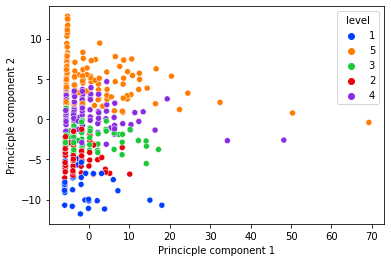

In [328]:
sns.scatterplot(data=df_scatter, x="Princicple component 1", y="Princicple component 2", hue="level", palette="bright")

* 備註:此處的1 2 3 4 5分別對應到A B C D F，當初為了做one-hot encoding方便起見直接換成數字了。